In [1]:
from getpass import getpass
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import db_builder.db_handler as dbh
import logging
import seaborn as sns 

logging.getLogger('sqlalchemy').setLevel(logging.WARNING)
db_params = {
    'user': 'postgres',
    'password': getpass('Please enter DB pw'),  # enter your DB password
    'host': 'localhost',  # 'localhost' or IP address
    'port': '5432',  # '5432'
    'database': 'ttdatabase',  #tensionTerminator
}
toolcheck = dbh.DB_Conn(db_params)
toolcheck.connect()
engine = toolcheck.get_engine()

Connected to PostgreSQL, DB: ttdatabase


In [2]:
def table_to_df(tabel_name: str):
    return pd.read_sql_table(tabel_name, con=engine)

In [3]:
def get_tools(id):
    tools_df = table_to_df('bodyside')
    tool_loc = tools_df.loc[tools_df['id'] == id].values
    return f"{tool_loc[0][1]}"

In [4]:
bodyside_loop_association_df = table_to_df('bodyside_loop_association').dropna()
bodyside_df = table_to_df('bodyside').dropna()

2023-11-28 20:11:59,207 INFO sqlalchemy.engine.Engine select pg_catalog.version()
2023-11-28 20:11:59,208 INFO sqlalchemy.engine.Engine [raw sql] {}
2023-11-28 20:11:59,209 INFO sqlalchemy.engine.Engine select current_schema()
2023-11-28 20:11:59,210 INFO sqlalchemy.engine.Engine [raw sql] {}
2023-11-28 20:11:59,211 INFO sqlalchemy.engine.Engine show standard_conforming_strings
2023-11-28 20:11:59,212 INFO sqlalchemy.engine.Engine [raw sql] {}
2023-11-28 20:11:59,213 INFO sqlalchemy.engine.Engine BEGIN (implicit)
2023-11-28 20:11:59,217 INFO sqlalchemy.engine.Engine SELECT pg_catalog.pg_class.relname 
FROM pg_catalog.pg_class JOIN pg_catalog.pg_namespace ON pg_catalog.pg_namespace.oid = pg_catalog.pg_class.relnamespace 
WHERE pg_catalog.pg_class.relname = %(table_name)s AND pg_catalog.pg_class.relkind = ANY (ARRAY[%(param_1)s, %(param_2)s, %(param_3)s, %(param_4)s, %(param_5)s]) AND pg_catalog.pg_table_is_visible(pg_catalog.pg_class.oid) AND pg_catalog.pg_namespace.nspname != %(nspname

In [5]:
bodyside_df

,id,side,time_in_use
4,5,left,00:00:41
5,6,middle,00:00:36
6,7,right,00:00:01
7,8,left,00:00:00
8,9,middle,00:02:00
...,...,...,...
65,66,middle,00:00:03
66,67,right,00:00:09
67,68,left,00:00:06
68,69,middle,00:01:56


In [7]:
count = bodyside_df.groupby(['side', 'time_in_use']).size().reset_index(name='Count')
count

,side,time_in_use,Count
0,left,00:00:00,3
1,left,00:00:01,1
2,left,00:00:02,1
3,left,00:00:03,1
4,left,00:00:06,1
5,left,00:00:13,1
6,left,00:00:14,2
7,left,00:00:22,1
8,left,00:00:23,1
9,left,00:00:35,1


In [8]:
bodyside_df['time_in_use'] = pd.to_datetime(bodyside_df['time_in_use'], format='%H:%M:%S')
bodyside_df['time_in_use_seconds'] = bodyside_df['time_in_use'].dt.hour * 3600 + bodyside_df['time_in_use'].dt.minute * 60 + bodyside_df['time_in_use'].dt.second

bodyside_df

,id,side,time_in_use,time_in_use_seconds
4,5,left,1900-01-01 00:00:41,41
5,6,middle,1900-01-01 00:00:36,36
6,7,right,1900-01-01 00:00:01,1
7,8,left,1900-01-01 00:00:00,0
8,9,middle,1900-01-01 00:02:00,120
...,...,...,...,...
65,66,middle,1900-01-01 00:00:03,3
66,67,right,1900-01-01 00:00:09,9
67,68,left,1900-01-01 00:00:06,6
68,69,middle,1900-01-01 00:01:56,116


In [11]:
time_sum_per_bodyside = bodyside_df.groupby('side')['time_in_use_seconds'].sum().reset_index()
time_sum_per_bodyside

,side,time_in_use_seconds
0,left,630
1,middle,1781
2,right,193


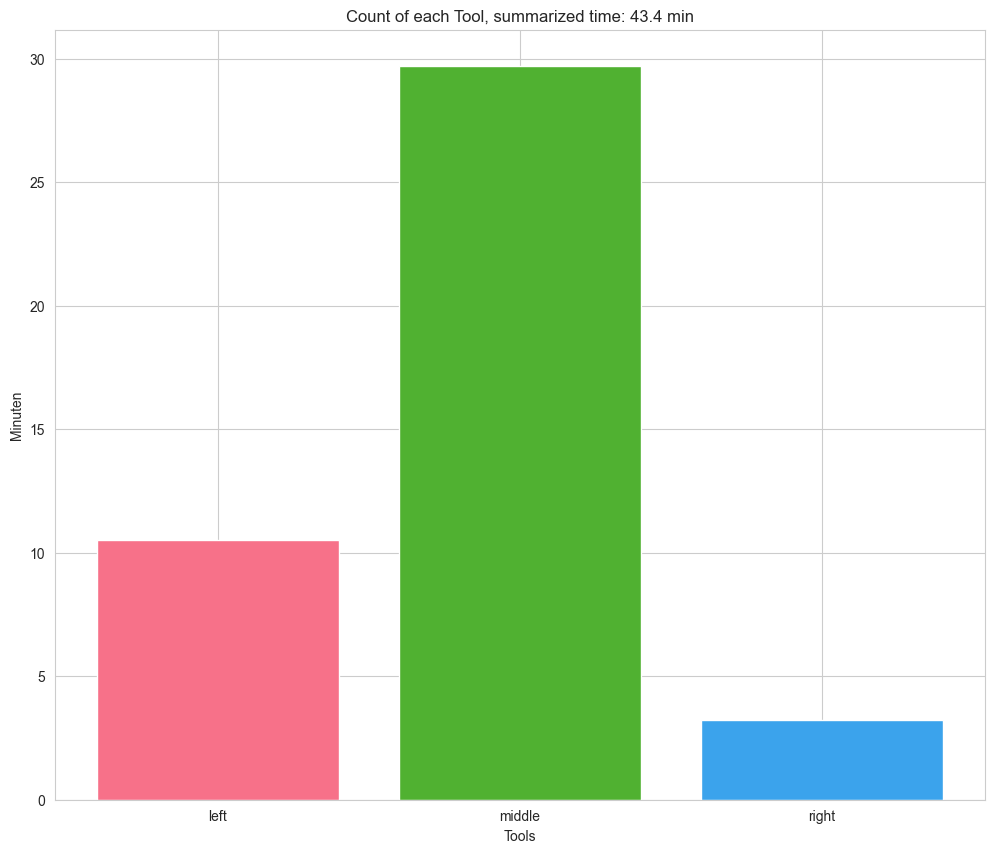

In [12]:
colors = sns.color_palette('husl', n_colors=len(time_sum_per_bodyside))

plt.figure(figsize=(12, 10))

plt.bar(time_sum_per_bodyside['side'], time_sum_per_bodyside['time_in_use_seconds']/60, color=colors)

plt.xlabel('Tools')
plt.ylabel('Minuten')
plt.title(f"Count of each Tool, summarized time: {time_sum_per_bodyside['time_in_use_seconds'].sum()/60} min")

plt.show()